In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import smallgraph as sg
import networkx as nx
from matplotlib import pyplot as plt
import lmz
import eden.graph as eg
import eden.display as ed
from yoda.graphs import ali2graph
import numpy as np
import yoda.ml.simpleMl as sml
import eden.display as ed
from yoda.alignments import load_rfam, filter_by_seqcount

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler
from kiez import Kiez 
from ubergauss import tools as ut
from ubergauss import optimization as op
import yoda.ml.simpleMl as sml
from yoda.graphs import alignment_to_vectors
import yoda.ml.distances as yodadist

In [36]:
import optihelper as oh

r = oh.hubness_ranking()
pd.set_option('display.max_rows', None)
print(r)

{'kiezMethod': [0, 1, 2, 3, 4], 'kiezK': [5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44]}
i changed this behaviour... makedata splits =2 
i changed this behaviour... makedata splits =2 
i changed this behaviour... makedata splits =2 
i changed this behaviour... makedata splits =2 
i changed this behaviour... makedata splits =2 


In [55]:
sd_per_group = df.groupby(['kiezMethod', 'data_id'])['score'].std().reset_index()

# 2. Calculate the mean of those SDs for each Method
final_result = sd_per_group.groupby('kiezMethod')['score'].mean()

print(final_result)

kiezMethod
0    0.000000
1    0.000000
2    0.004151
3    0.004355
4    0.004355
Name: score, dtype: float64


In [57]:
# ---------------------------------------------------------
# 1. Method 0 Stats per Dataset (Mean & Std)
# ---------------------------------------------------------
print("--- 1. Method 0: Mean and Std Dev per Dataset ---")
method_0_stats = df[df['kiezMethod'] == 0].groupby('data_id')['score'].agg(['mean', 'std'])
# Note: std will likely be 0.0 because Method 0 scores are identical across K for the same data_id
print(method_0_stats)

for i in range(4):
    stuff = df[df['kiezMethod'] == i]['score'].agg(['mean', 'std'])
    # Note: std will likely be 0.0 because Method 0 scores are identical across K for the same data_id
    print(stuff)

# ---------------------------------------------------------
# 2. Select Best K for each Method (Highest Mean Score across Datasets)
# ---------------------------------------------------------
print("\n--- 2. Best K for Each Method (Highest Mean Score across Datasets) ---")
k_performance = df.groupby(['kiezMethod', 'kiezK'])['score'].mean().reset_index()
best_k_indices = k_performance.groupby('kiezMethod')['score'].idxmax()
best_k_per_method = k_performance.loc[best_k_indices]
best_k_per_method.rename(columns={'kiezK': 'Best_K', 'score': 'Max_Mean_Score'}, inplace=True)
print(best_k_per_method.to_string(index=False))

# ---------------------------------------------------------
# 3. Overall Score Stats per Method (Mean & Std over all Datasets)
# ---------------------------------------------------------
print("\n--- 3. Overall Method Performance (Mean & Std over all Datasets & K) ---")
method_overall_stats = df.groupby('kiezMethod')['score'].agg(['mean', 'std']).reset_index()
print(method_overall_stats.to_string(index=False))

--- 1. Method 0: Mean and Std Dev per Dataset ---
             mean  std
data_id               
0        0.469487  0.0
1        0.464285  0.0
2        0.443491  0.0
3        0.428683  0.0
4        0.408124  0.0
mean    0.442814
std     0.022862
Name: score, dtype: float64
mean    0.480094
std     0.022374
Name: score, dtype: float64
mean    0.483106
std     0.021195
Name: score, dtype: float64
mean    0.482941
std     0.021195
Name: score, dtype: float64

--- 2. Best K for Each Method (Highest Mean Score across Datasets) ---
 kiezMethod  Best_K  Max_Mean_Score
          0       5        0.442814
          1       5        0.480094
          2      20        0.486458
          3      17        0.486485
          4      17        0.486485

--- 3. Overall Method Performance (Mean & Std over all Datasets & K) ---
 kiezMethod     mean      std
          0 0.442814 0.022862
          1 0.480094 0.022374
          2 0.483106 0.021195
          3 0.482941 0.021195
          4 0.482941 0.021195

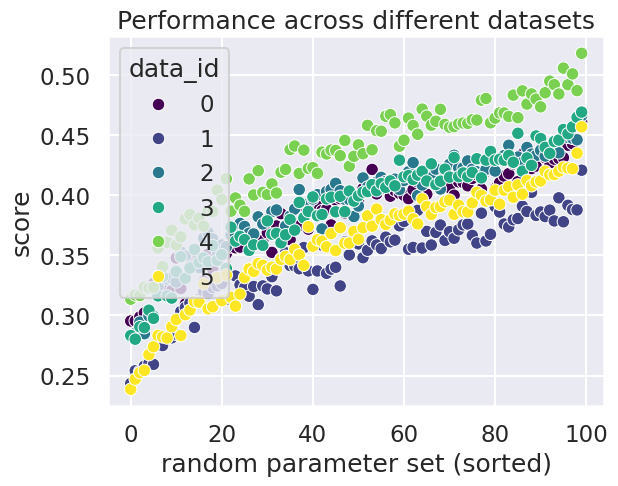

In [31]:

r = oh.overfit_plot(100,6)
r2 = oh.oldplot(r)

In [24]:
print(r2)

None


In [3]:
space = '''min_r 0 3 1
min_d 0 3 1
fix_edges 0 1 1
ct .88 1
d1 0 1
d2 0 1
nest 0 1 1
kiezK 23 30 1
kiezMethod 0 5 1
simplegraph 0 1 1
bad_weight 0 .3'''

# clusterSize 0 40 5
# a,l, te = sg.makedata()

#eval(a,l,**{'min_d': 2, 'nest': 1})
# a,l = sg.makedata(splits=0)
# matrix = alignment_to_vectors(a)


In [4]:
data = sg.makedata(splits=2)[:2]

In [5]:
from ubergauss.optimization import nutype,gatype
import optihelper as oh
import copy
o = nutype.nutype(space, oh.eval, [data], numsample=16)
o.opti()
# print(n.NU)
# Best params: {'bad_weight': 0.1607173103329372, 'ct': 0.9110921699651566, 'd1': 0.6318627398862378, 'd2': 0.2554687630753362, 'fix_edges': 1.0, 'kiezK': 28.0, 'kiezMethod': 2.0, 'min_d': 3.0, 'min_r': 1.0, 'nest': 1.0, 'simplegraph': 0.0, 'datafield': 0.0, 'score': 0.6124208382137607, 'time': 64.91160798072815}

    bad_weight        ct        d1        d2  fix_edges  kiezK  kiezMethod  \
15    0.151432  0.937327  0.983712  0.053906          0     24           3   
2     0.234952  0.982007  0.596443  0.940641          1     26           2   
7     0.116626  0.971584  0.000827  0.678897          0     26           3   
6     0.258432  0.927605  0.367294  0.919146          1     27           1   
10    0.290906  0.917259  0.804396  0.093669          1     25           4   
13    0.075918  0.958511  0.874130  0.602692          0     27           4   
14    0.227931  0.892992  0.375913  0.908228          1     25           2   
12    0.287548  0.911451  0.311552  0.436970          1     27           1   

    min_d  min_r  nest  simplegraph  config_id     score       time  
15      1      2     1            0         15  0.388709  46.115115  
2       1      2     1            1          2  0.385501  46.140630  
7       3      1     1            1          7  0.385187  44.690408  
6       3      1 

NameError: name 'n' is not defined

In [6]:
# z = copy.deepcopy(o)
z.opti()
z.nuParams()

NameError: name 'z' is not defined

In [7]:
o.opti()
o.opti()
o.opti()
o.opti()

    bad_weight        ct        d1        d2  fix_edges  kiezK  kiezMethod  \
5     0.194676  0.955237  0.225487  0.387037          1     28           5   
15    0.050963  0.904062  0.005805  0.214588          1     25           4   
13    0.127719  0.959947  0.458572  0.169674          0     27           4   
11    0.149328  0.973001  0.570099  0.119016          1     28           3   
12    0.034414  0.913737  0.605467  0.704802          0     25           4   
7     0.242885  0.956178  0.852700  0.708225          0     25           4   
14    0.164944  0.955971  0.395894  0.191013          0     28           2   
2     0.042782  0.981797  0.079872  0.534828          1     26           3   

    min_d  min_r  nest  simplegraph  config_id     score       time  
5       2      1     1            1          5  0.393750  46.466156  
15      2      2     1            1         15  0.387506  45.171468  
13      1      1     1            0         13  0.382787  48.167986  
11      2      0 

In [8]:
%%time 
o.opti()

    bad_weight        ct        d1        d2  fix_edges  kiezK  kiezMethod  \
0     0.156966  0.911308  0.055563  0.542387          1     27           5   
10    0.227095  0.896362  0.352143  0.412455          1     27           3   
6     0.222854  0.932891  0.413861  0.258002          1     27           4   
8     0.125002  0.974257  0.229302  0.770042          1     27           4   
12    0.246513  0.970946  0.681858  0.873516          1     25           4   
3     0.077595  0.899903  0.490671  0.836502          1     27           5   
1     0.114743  0.934871  0.820061  0.617714          0     25           5   
9     0.066190  0.929488  0.671826  0.409033          1     26           2   

    min_d  min_r  nest  simplegraph  config_id     score       time  
0       3      1     1            0          0  0.410075  44.468396  
10      3      1     1            0         10  0.404406  44.494454  
6       3      1     1            1          6  0.401043  44.868567  
8       1      1 

In [9]:
o.nuParams()
o.print()

    bad_weight        ct        d1        d2  fix_edges  kiezK  kiezMethod  \
0     0.156966  0.911308  0.055563  0.542387          1     27           5   
10    0.227095  0.896362  0.352143  0.412455          1     27           3   
6     0.222854  0.932891  0.413861  0.258002          1     27           4   
8     0.125002  0.974257  0.229302  0.770042          1     27           4   
12    0.246513  0.970946  0.681858  0.873516          1     25           4   
3     0.077595  0.899903  0.490671  0.836502          1     27           5   
1     0.114743  0.934871  0.820061  0.617714          0     25           5   
9     0.066190  0.929488  0.671826  0.409033          1     26           2   

    min_d  min_r  nest  simplegraph  config_id     score       time  
0       3      1     1            0          0  0.410075  44.468396  
10      3      1     1            0         10  0.404406  44.494454  
6       3      1     1            1          6  0.401043  44.868567  
8       1      1 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

o.nuParams(o.df)
def plot_params_with_hist(params, df):
    for col in params.columns:
        if col == "score":
            continue  # Skip the score column itself

        fig, ax1 = plt.subplots(figsize=(8, 4))

        # Lineplot: param vs score
        sns.lineplot(x=col, y="score", data=df, ax=ax1, color='blue', label='Score')
        ax1.set_ylabel("Score", color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Histogram: distribution of values in df
        ax2 = ax1.twinx()
        sns.histplot(params[col], ax=ax2, color='gray', alpha=0.3, bins=20, label='Distribution')
        ax2.set_ylabel("Frequency", color='gray')
        ax2.tick_params(axis='y', labelcolor='gray')

        # Titles and layout
        plt.title(f"{col} vs Score with Distribution Overlay")
        fig.tight_layout()
        plt.show()
plot_params_with_hist(pd.DataFrame(o.params), o.df)

TypeError: nutype.nuParams() takes 1 positional argument but 2 were given

In [11]:
# space = sg.string_to_space(yodadist.params)

# kiezPresort 0 150 1
space = sg.string_to_space(space)
parameters = [space.sample() for i in range(100)]
parameters

[{'bad_weight': 0.14796373050140077,
  'ct': 0.9527527488456347,
  'd1': 0.9205161287534858,
  'd2': 0.47808995759239514,
  'fix_edges': 0,
  'kiezK': 30,
  'kiezMethod': 2,
  'min_d': 2,
  'min_r': 2,
  'nest': 1,
  'simplegraph': 0},
 {'bad_weight': 0.08789989490456938,
  'ct': 0.9028947854345839,
  'd1': 0.20162122673879812,
  'd2': 0.7166426565407675,
  'fix_edges': 0,
  'kiezK': 29,
  'kiezMethod': 1,
  'min_d': 2,
  'min_r': 2,
  'nest': 1,
  'simplegraph': 0},
 {'bad_weight': 0.07517733723100528,
  'ct': 0.9645081947992776,
  'd1': 0.30595492531693314,
  'd2': 0.2361618267789748,
  'fix_edges': 1,
  'kiezK': 27,
  'kiezMethod': 2,
  'min_d': 1,
  'min_r': 3,
  'nest': 1,
  'simplegraph': 0},
 {'bad_weight': 0.2884693156856569,
  'ct': 0.9557848812932396,
  'd1': 0.5766981104770885,
  'd2': 0.9171219426951156,
  'fix_edges': 1,
  'kiezK': 26,
  'kiezMethod': 2,
  'min_d': 2,
  'min_r': 2,
  'nest': 1,
  'simplegraph': 1},
 {'bad_weight': 0.12690001290578584,
  'ct': 0.96472920193

In [12]:

data = sg.makedata(splits=2)[:2]


In [13]:
import optihelper as oh
#results = op.gridsearch(eval, tasks =  parameters , data=(a,l,matrix), mp=True)
results= op.gridsearch(oh.eval,  data_list =[data],tasks = parameters, mp=True)



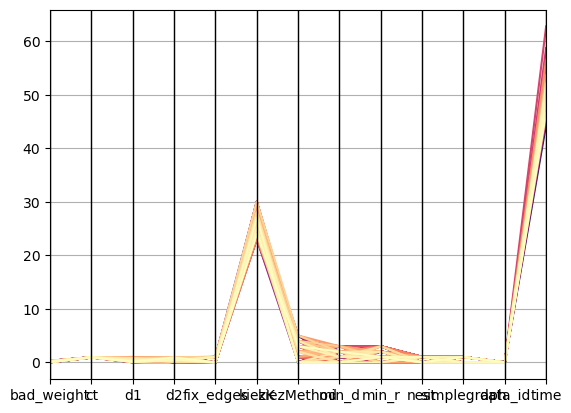

In [14]:
pd.plotting.parallel_coordinates(results, 'score', colormap = 'magma')
plt.legend().remove()

In [15]:
# results.to_csv('rando.csv')
!head rando.csv

head: cannot open 'rando.csv' for reading: No such file or directory


In [16]:
pcp(results.index)

NameError: name 'pcp' is not defined

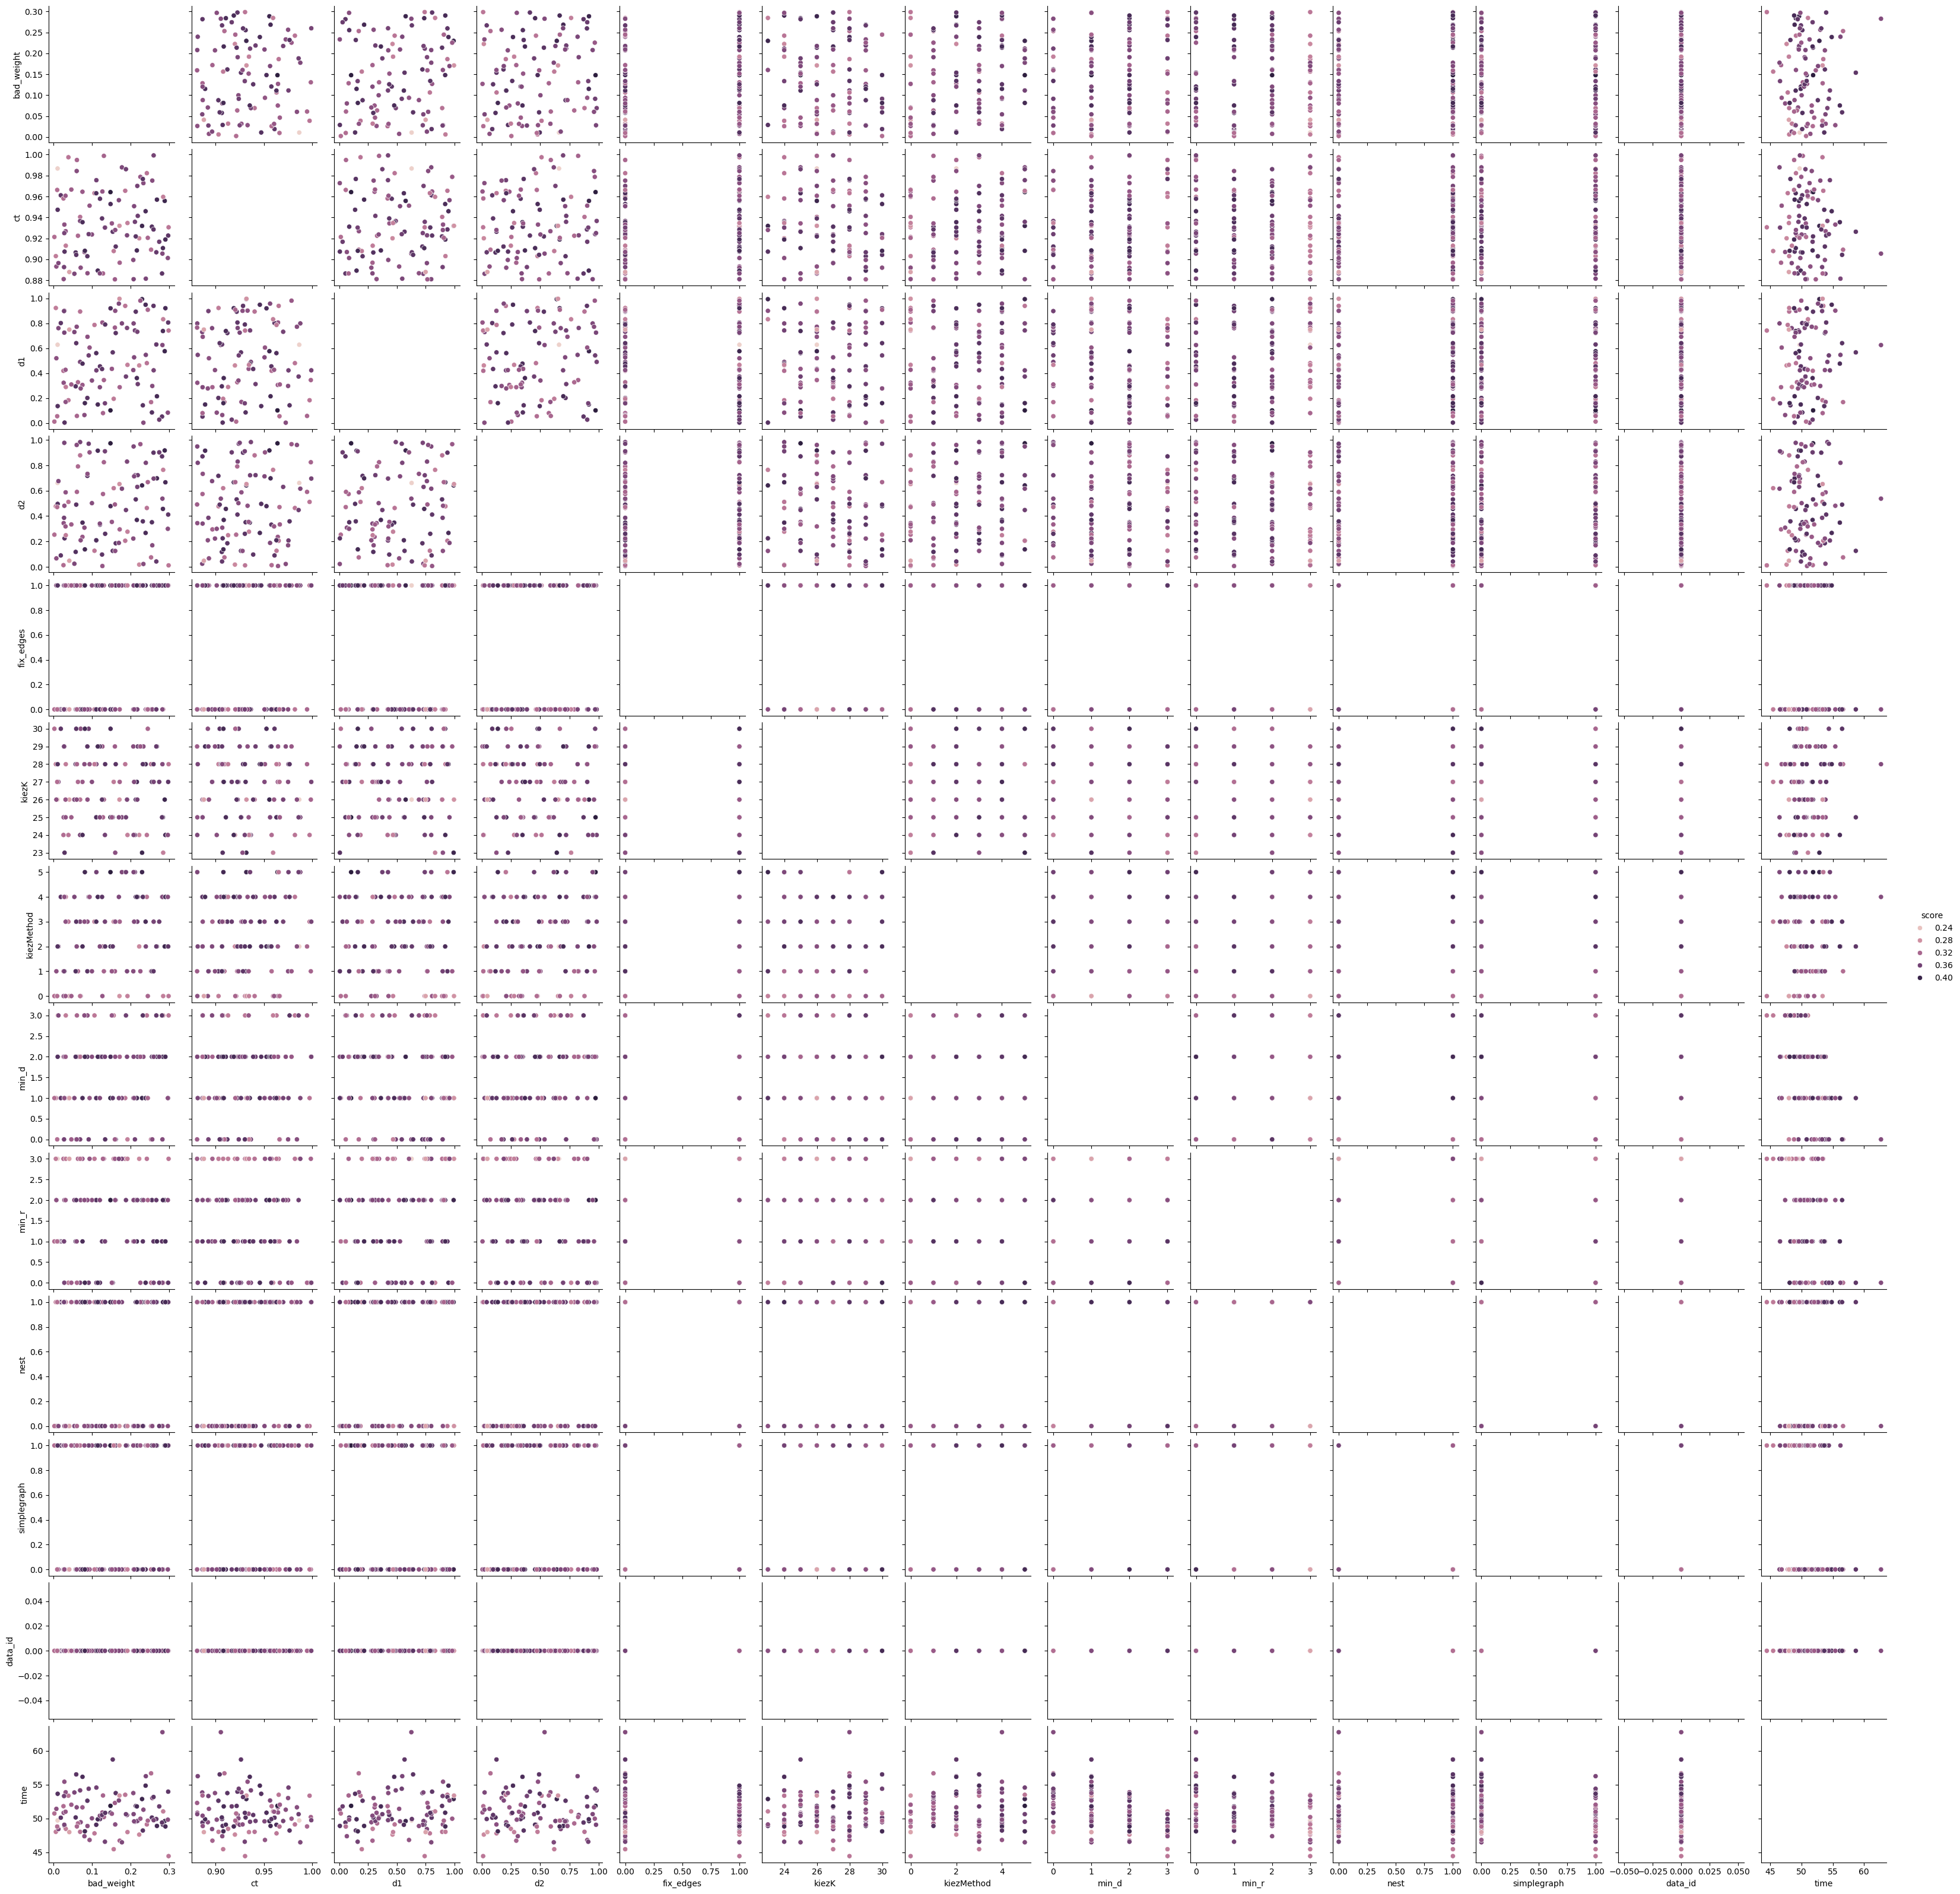

In [17]:
results.corr()
sns.pairplot(results, hue='score')


In [ ]:
results.sort_values(by='score', ascending=False).head(20)

In [ ]:
results.pop('time')
results.pop('datafield')
results.corr()


In [ ]:

#sns.pairplot(results, hue='score')
results.corr()

In [18]:
%%time
datas  = [sg.makedata(splits=3)[:2]]


# datas   = [sg.makedata(splits=3)[:2] for x in range(3) ]
# datas = [(ali2graph.multiGraph(a),l) for a,l in datas ]


CPU times: user 3.58 s, sys: 4.36 s, total: 7.94 s
Wall time: 7.95 s


In [19]:
%%time
parameters = {'clusterSize':10, 'simplegraph':0 , 'maxclust':10, 'fix_edges':True}
eval(*datas[0], **parameters)
# 475

TypeError: eval() takes no keyword arguments

In [20]:
%%time
parameters = {'clusterSize':[0,15], 'simplegraph':[0,1] , 'maxclust':[10]}
# results = [op.gridsearch(eval, tasks =  parameters , data=data, mp=True)  for data in datas]

results = op.gridsearch(eval, param_dict =  parameters , data=datas[0], mp=True)
# results = [ op.gridsearch(eval, param_dict =  parameters , data=data , mp=True) for data in datas];results = pd.concat(results)

TypeError: object of type 'NoneType' has no len()

In [21]:
if False:
    resultsXX = pd.concat(resultsXXX+results4)
    results5c = pd.concat(results5)
    sns.pairplot(resultsXX)
    resultsXX.sort_values(by='csls', ascending=False).head(20)
    sns.lineplot(resultsXX, x= 'clusterSize', y='csls',label= 'conserved columns weighted')
    sns.lineplot(results5c, x= 'clusterSize', y='csls', label='unweighted')

In [22]:
# results = pd.concat(results)
results.sort_values(by='csls', ascending=False).head(20)

sns.lineplot(results, x= 'clusterSize', y='csls', hue= 'simplegraph')

KeyError: 'csls'

In [ ]:

sns.pairplot(results, hue='score')


In [23]:
space_dict = sg.string_to_space(space)
parameters = [space_dict.sample() for i in range(2)]
data = sg.makedata(splits=0)
results = op.gridsearch(eval, tasks =  parameters , data=data, mp=False) 

AttributeError: 'spaceship' object has no attribute 'split'

In [24]:
results.sort_values(by='csls', ascending=False).head(20)

KeyError: 'csls'

In [25]:
plt.figure(figsize=(10, 6))
for column in hub_methods:  # Replace with your actual column names
    sns.kdeplot(data=results[column], label=column)
plt.legend()

NameError: name 'hub_methods' is not defined

<Figure size 1000x600 with 0 Axes>

In [26]:


space = '''d1 0 1
d2 0 1
'''

# a,l, te = sg.makedata()

#eval(a,l,**{'min_d': 2, 'nest': 1})
space_dict = sg.string_to_space(space)
parameters = [space_dict.sample() for i in range(100)]
data = sg.makedata(splits=0)
for t in parameters:
    t['hub_methods']=['csls']
results = op.gridsearch(eval, tasks =  parameters , data=data, mp=True) 
results.sort_values(by='csls', ascending=False).head(100)

TypeError: object of type 'NoneType' has no len()

In [ ]:
sns.pairplot(results)

In [ ]:
results.sort_values(by='csls', ascending=False).head(100)

In [ ]:

def rank_columns_and_average(df, columns):
    # Subset the dataframe to include only the specified columns
    subset_df = df[columns]
    # Rank the values row-wise
    ranked_df = subset_df.rank(axis=1)
    # Calculate the average rank for each column
    avg_ranks = ranked_df.mean().to_dict()
    # Create a list of pairs (column name, average rank)
    result = [(col, avg_ranks[col]) for col in columns]
    return result


rank_columns_and_average(results,['csls', 'dissimlocal', 'localscaling', 'mutualproximity', 'norm', 'no'])

In [ ]:
data_all = [sg.makedata() for i in range(REPEATS)]
datasets = [d[:2] for d in data_all]
test_sets = [d[2] for d in data_all]


In [ ]:
test_sets, datasets = datasets, test_sets

In [27]:
space = sg.string_to_space(space)
parameters = [space.sample() for i in range(PARAMS)]

NameError: name 'PARAMS' is not defined

In [28]:

results = [ op.gridsearch(eval, parameters , tasks = parameters , data= [a,l], mp=True)  for a,l in datasets]


NameError: name 'datasets' is not defined

In [30]:
parameters

[{'d1': 0.0705729842125753,
  'd2': 0.019551924639208074,
  'hub_methods': ['csls']},
 {'d1': 0.9789579958684276, 'd2': 0.1058087846662602, 'hub_methods': ['csls']},
 {'d1': 0.2044827407631189, 'd2': 0.4528914828992967, 'hub_methods': ['csls']},
 {'d1': 0.6937146904014192,
  'd2': 0.36759154200692157,
  'hub_methods': ['csls']},
 {'d1': 0.9924373586494106,
  'd2': 0.33908432436112024,
  'hub_methods': ['csls']},
 {'d1': 0.19394430830813847,
  'd2': 0.9146773965823586,
  'hub_methods': ['csls']},
 {'d1': 0.11044941805275577,
  'd2': 0.5228519605526261,
  'hub_methods': ['csls']},
 {'d1': 0.15886467822649597, 'd2': 0.139801487120487, 'hub_methods': ['csls']},
 {'d1': 0.2885230057042384, 'd2': 0.5884444161717893, 'hub_methods': ['csls']},
 {'d1': 0.14616057310270159,
  'd2': 0.4671571534478808,
  'hub_methods': ['csls']},
 {'d1': 0.33277059969746803,
  'd2': 0.9045320527751823,
  'hub_methods': ['csls']},
 {'d1': 0.2717791583351584, 'd2': 0.544498994914011, 'hub_methods': ['csls']},
 {'d1

In [29]:
def train_test_error(results):
    for i,df in enumerate(results):
        # in all the dfs, we only look at the max value up to index
        df['max_score'] = df['score'].expanding().max()
        # when a value changes, calculate the test error 
        score_changes = df['max_score'].diff().ne(0)
        top_score_rows = df[score_changes]
        top_score_dicts = top_score_rows.to_dict('records')
        nures =  op.gridsearch(eval, parameters , tasks = top_score_dicts , data= test_sets[i], mp=True) 


        def outer_pointget():
            idx = -1
            def pointget(z):
                nonlocal idx
                if z:
                    idx += 1
                return nures['score'][idx]
            return pointget
        pointget= outer_pointget()     
        df['test_score'] = [ pointget(e) for e in score_changes ] 

train_test_error(results)


TypeError: string indices must be integers, not 'str'

In [ ]:
# make a lineplot 
sns.set_theme()
sns.set_context("talk")

merged_df = pd.concat(results)
sns.lineplot(data = merged_df,x=merged_df.index, y = 'max_score', label ='train score')
sns.lineplot(data = merged_df,x=merged_df.index, y = 'test_score', label ='test score')

In [ ]:
df  = merged_df
top_score_idx = df['score'].idxmax()
top_score_row = df.loc[top_score_idx]
top_score_dict = top_score_row.to_dict()

In [ ]:
top_score_dict

In [ ]:
import pandas as pd
x = 5

top_dfs = [df.sort_values('score', ascending=False).head(x) for df in results]
merged_df = pd.concat(top_dfs)
merged_df

In [ ]:
merged_df = pd.concat(results)
merged_df.corr()

In [ ]:
df.groupby('min_r')['score'].mean()

In [ ]:
import optihelper as oh
data = oh.makedata(8)



In [ ]:
res

In [ ]:
res = oh.run(data)
ax = oh.plot(oh.fixdata(res))


In [ ]:

figpath =  !echo $HOME/pigplot/
figpath = figpath[0]


ax = oh.plot(oh.fixdata(res))
ax.get_figure().savefig(figpath+'hyperparams.png', bbox_inches='tight')

if False:
    # this is interesting but just confusing
    moredata = oh.nosamplingdata()
    sns.scatterplot(data=moredata, x='experiment', y='score')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import Normalize

iris = results[results.min_r != 3]



g = sns.PairGrid(iris)

# Function to bin and average hue
def binned_avg_hue(x, y, hue, bins=15, **kwargs):
    if len(x) < 2: return

    # 2D histogram binning
    df = pd.DataFrame({'x': x, 'y': y, 'hue': hue})
    xbins = np.linspace(x.min(), x.max(), bins)
    ybins = np.linspace(y.min(), y.max(), bins)
    
    df['x_bin'] = np.digitize(df['x'], xbins)
    df['y_bin'] = np.digitize(df['y'], ybins)
    
    grouped = df.groupby(['x_bin', 'y_bin'])['hue'].mean().reset_index()
    
    # Convert bin indexes to bin centers
    grouped['x'] = xbins[grouped['x_bin'] - 1]
    grouped['y'] = ybins[grouped['y_bin'] - 1]

    # Normalize hue to [0,1] for colormap
    norm = Normalize(vmin=iris.score.min(), vmax=iris.score.max())
    plt.scatter(grouped['x'], grouped['y'], c=grouped['hue'], cmap='viridis', norm=norm, s=50)

# Apply to lower triangle
g.map_lower(lambda x, y, **kwargs: binned_avg_hue(x, y, iris.score, **kwargs))

# Optional: diagonal and upper
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot, hue=iris.score)
plt.colorbar()
plt.show()

In [ ]:
iris.sort_values(by = 'score', ascending = False)[:20]

In [ ]:
iris.sort_values(by = 'score', ascending = False)[-20:]

In [ ]:
import numpy as np

# Braille dot encoding lookup
# Each Braille character is a 2x4 dot matrix:
# Dot positions:
# 1 4
# 2 5
# 3 6
# 7 8
DOT_POS = {
    (0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 6,
    (1, 0): 3, (1, 1): 4, (1, 2): 5, (1, 3): 7
}

def plot_braille(x, y, rows=20, cols=40):
    if len(x) != len(y):
        raise ValueError("x and y must be the same length")

    # Scale data into pixel coordinates (cols*2 wide, rows*4 tall)
    x = np.asarray(x)
    y = -np.asarray(y)

    # 2x4 pixel grid per Braille character
    width_px = cols * 2
    height_px = rows * 4

    x_bins = np.linspace(np.min(x), np.max(x), width_px + 1)
    y_bins = np.linspace(np.min(y), np.max(y), height_px + 1)

    x_idx = np.digitize(x, x_bins) - 1
    y_idx = np.digitize(y, y_bins) - 1

    # Clamp to grid bounds
    x_idx = np.clip(x_idx, 0, width_px - 1)
    y_idx = np.clip(y_idx, 0, height_px - 1)

    
    # Initialize Braille canvas
    canvas = np.zeros((rows, cols), dtype=np.uint8)

    for xi, yi in zip(x_idx, y_idx):
        char_col = xi // 2
        char_row = yi // 4
        dot_col = xi % 2
        dot_row = yi % 4

        dot_bit = DOT_POS[(dot_col, dot_row)]
        canvas[char_row, char_col] |= (1 << dot_bit)

    chars = [["".join(chr(0x2800 + cell) if cell else ' ' for cell in row)] for row in canvas]
    return chars

# Example usage
if __name__ == "__main__":
    import math
    x_vals = np.linspace(0, 4 * math.pi, 16)
    y_vals = np.sin(x_vals)

    x = [0.11966315947618589, 0.12776516850249564, 0.13586717752880537, 0.14396918655511512, 0.15207119558142485, 0.1601732046077346, 0.16827521363404435, 0.1763772226603541, 0.18447923168666383, 0.19258124071297356, 0.2006832497392833, 0.20878525876559306, 0.21688726779190282, 0.22498927681821254, 0.2330912858445223, 0.24119329487083202, 0.24929530389714177, 0.2573973129234515, 0.2654993219497612, 0.273601330976071, 0.28170334000238073, 0.2898053490286905, 0.29790735805500024, 0.30600936708131, 0.31411137610761974, 0.3222133851339295, 0.3303153941602392, 0.33841740318654895, 0.3465194122128587, 0.3546214212391684, 0.36272343026547815, 0.3708254392917879, 0.37892744831809766, 0.3870294573444074, 0.39513146637071717, 0.40323347539702686, 0.4113354844233366, 0.41943749344964637, 0.4275395024759561, 0.4356415115022659, 0.4437435205285756, 0.45184552955488533, 0.4599475385811951, 0.46804954760750483, 0.4761515566338146, 0.48425356566012434, 0.49235557468643404, 0.5004575837127438, 0.5085595927390536, 0.5166616017653634] 
    y= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 3, 2, 1, 6, 4 ,5, 6, 2, 4, 2, 0, 3, 3, 2, 4, 1, 0, 1, 0, 0, 2, 0, 0, 1]

    print(plot_braille(x_vals, y_vals, rows=2, cols=16))

In [ ]:
import structout as so
x = [0.11966315947618589, 0.12776516850249564, 0.13586717752880537, 0.14396918655511512, 0.15207119558142485, 0.1601732046077346, 0.16827521363404435, 0.1763772226603541, 0.18447923168666383, 0.19258124071297356, 0.2006832497392833, 0.20878525876559306, 0.21688726779190282, 0.22498927681821254, 0.2330912858445223, 0.24119329487083202, 0.24929530389714177, 0.2573973129234515, 0.2654993219497612, 0.273601330976071, 0.28170334000238073, 0.2898053490286905, 0.29790735805500024, 0.30600936708131, 0.31411137610761974, 0.3222133851339295, 0.3303153941602392, 0.33841740318654895, 0.3465194122128587, 0.3546214212391684, 0.36272343026547815, 0.3708254392917879, 0.37892744831809766, 0.3870294573444074, 0.39513146637071717, 0.40323347539702686, 0.4113354844233366, 0.41943749344964637, 0.4275395024759561, 0.4356415115022659, 0.4437435205285756, 0.45184552955488533, 0.4599475385811951, 0.46804954760750483, 0.4761515566338146, 0.48425356566012434, 0.49235557468643404, 0.5004575837127438, 0.5085595927390536, 0.5166616017653634] 
y= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 3, 2, 1, 6, 4 ,5, 6, 2, 4, 2, 0, 3, 3, 2, 4, 1, 0, 1, 0, 0, 2, 0, 0, 1]
so.scatter(x,y)

In [ ]:
from PIL import Image
import numpy as np

def convert_to_custom_grayscale(image_path, output_path=''):
    img = Image.open(image_path).convert('RGB')
    img_np = np.array(img)
    R = img_np[:,:,0].astype(float)
    G = img_np[:,:,1].astype(float)
    B = img_np[:,:,2].astype(float)
    # grayscale = B - (R + G) / 2
    grayscale = B *2 - R -G
    grayscale[grayscale < 0] =0
    grayscale_norm = grayscale
    #grayscale_norm = grayscale_norm.astype(np.uint8)
    grayscale_img = Image.fromarray(grayscale_norm)
    #grayscale_img.show()
    #grayscale_img.save('/home/ikea/test.png')

    
    rgb_array = np.stack([grayscale_norm]*3, axis=-1)  # Stack grayscale as R, G, B
    
    # Convert to PIL Image with RGB mode
    rgb_img = Image.fromarray(rgb_array, 'RGB')
    
    # Save the image
    path = '/home/ikea/output_rgb.png'


    grayscale_norm = grayscale_norm.astype(np.uint8)  # Convert to uint8
    grayscale_img = Image.fromarray(grayscale_norm)
    grayscale_img.save(path, 'PNG')
convert_to_custom_grayscale('/home/ikea/Downloads/5402504650445420277.jpg')
# convert_to_custom_grayscale('/home/ikea/Downloads/5402504650445420230.jpg')
#convert_to_custom_grayscale('/home/ikea/Downloads/5402504650445420231.jpg')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca_of_image_colors(image_path, sample_fraction=0.1, n_components=3):
    """
    Loads an image, performs PCA on its RGB pixel data, and creates a 2D scatter plot
    of the transformed data, colored by the original pixel colors.

    Args:
        image_path (str): The file path to the input image.
        sample_fraction (float, optional): The fraction of pixels to sample for analysis. 
                                           1.0 means all pixels. Defaults to 0.1 (10%) for performance.
        n_components (int, optional): The number of principal components to reduce to. Defaults to 2.
    """
    try:
        # 1. Load the image and convert to an RGB numpy array
        with Image.open(image_path) as img:
            # Ensure image is in RGB format
            img_rgb = img.convert('RGB')
            img_np = np.array(img_rgb)

    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return
    except Exception as e:
        print(f"An error occurred while opening the image: {e}")
        return

    # 2. Prepare the data for PCA
    # Reshape the (height, width, 3) image array into a (num_pixels, 3) array
    # where each row is a pixel and columns are R, G, B.
    h, w, c = img_np.shape
    pixel_data = img_np.reshape(-1, c)
    print(f"Image loaded: {w}x{h} ({h*w:,} pixels)")
    
    # 3. Sample the data for performance if needed
    if sample_fraction < 1.0:
        num_pixels = pixel_data.shape[0]
        sample_size = int(num_pixels * sample_fraction)
        print(f"Sampling {sample_size:,} pixels ({sample_fraction * 100:.1f}%) for performance...")
        # Generate random indices without replacement
        random_indices = np.random.choice(num_pixels, size=sample_size, replace=False)
        # Select the sampled pixels
        pixel_data_sampled = pixel_data[random_indices]
    else:
        pixel_data_sampled = pixel_data

    # 4. Perform PCA
    print("Performing PCA...")
    pca = PCA(n_components=n_components)
    # Fit PCA on the sampled pixel data and transform it
    transformed_data = pca.fit_transform(pixel_data_sampled)
    
    # Explained variance tells us how much information each component captures
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance by components: {explained_variance}")
    print(f"Total variance explained by {n_components} components: {sum(explained_variance)*100:.2f}%")

    # 5. Prepare colors for plotting
    # The `c` argument in matplotlib's scatter expects colors to be in the [0, 1] range.
    # We use the original colors of the sampled pixels.
    colors_for_plot = pixel_data_sampled / 255.0

    # 6. Plot the results
    print("Generating plot...")
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.scatter(
        transformed_data[:, 0], 
        transformed_data[:, 1], 
        c=colors_for_plot,
        alpha=1, # Use transparency to see density
        s=5        # Use small markers
    )
    
    ax.set_title(f'2D PCA of Image Color Space ({image_path.split("/")[-1]})')
    ax.set_xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
    ax.set_ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
    ax.grid(True)
    
    plt.show()
    plt.scatter(
        transformed_data[:, 2], 
        transformed_data[:, 1], 
        c=colors_for_plot,
        alpha=1, # Use transparency to see density
        s=5        # Use small markers
    )
    plt.show()
   

plot_pca_of_image_colors('/home/ikea/Downloads/5402504650445420277.jpg')
plot_pca_of_image_colors('/home/ikea/Downloads/5402504650445420230.jpg')
plot_pca_of_image_colors('/home/ikea/Downloads/5402504650445420231.jpg')
plot_pca_of_hsv_colors('/home/ikea/Downloads/pudding.png')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def reconstruct_image_without_pc(image_path, component_to_remove=2, output_path=None):
    """
    Loads an image, performs PCA on its colors, removes a specified principal
    component, and reconstructs the image from the modified data.

    Args:
        image_path (str): The file path to the input image.
        component_to_remove (int): The index of the principal component to remove (0, 1, or 2).
                                   Defaults to 1 (which is PC2).
        output_path (str, optional): If provided, saves the reconstructed image to this path.
                                     Defaults to None.
    """
    if not 0 <= component_to_remove <= 2:
        print("Error: component_to_remove must be 0, 1, or 2.")
        return

    try:
        # 1. Load the image and get pixel data
        with Image.open(image_path) as img:
            img_rgb = img.convert('RGB')
            img_np = np.array(img_rgb)
    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return

    # Store original shape and data type for reconstruction
    h, w, c = img_np.shape
    original_dtype = img_np.dtype
    
    # Reshape for PCA: (num_pixels, 3)
    pixel_data = img_np.reshape(-1, c)
    print(f"Image loaded: {w}x{h}. Processing {pixel_data.shape[0]:,} pixels.")

    # 2. Perform PCA
    # We need all 3 components to do a full inverse transform
    print("Fitting PCA...")
    pca = PCA(n_components=3)
    
    # Fit and then transform the data into the PCA coordinate space
    transformed_data = pca.fit_transform(pixel_data)

    # 3. Modify the data by "removing" the specified component
    print(f"Removing Principal Component {component_to_remove + 1}...")
    # Create a copy to avoid modifying the original transformed data
    modified_data = transformed_data.copy()
    # Set the entire column for the chosen component to zero
    modified_data[:, component_to_remove] = 0

    # 4. Inverse transform back to RGB space
    print("Reconstructing image from modified data...")
    # Use the inverse_transform method to go from PCA space back to RGB space
    reconstructed_pixels = pca.inverse_transform(modified_data)

    # 5. Reshape and format the image for display
    # Clip values to the valid [0, 255] range for colors
    reconstructed_pixels = np.clip(reconstructed_pixels, 0, 255)
    
    # Reshape back to the original image dimensions
    reconstructed_img_np = reconstructed_pixels.reshape(h, w, c)
    
    # Convert back to the original data type (e.g., uint8)
    reconstructed_img_np = reconstructed_img_np.astype(original_dtype)
    
    # Convert the numpy array to a PIL Image object
    reconstructed_img = Image.fromarray(reconstructed_img_np)

    # 6. Display the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(reconstructed_img)
    axes[1].set_title(f"Reconstructed (PC{component_to_remove + 1} Removed)")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

    # 7. Save the image if an output path is provided
    if output_path:
        reconstructed_img.save(output_path)
        print(f"Reconstructed image saved to {output_path}")




reconstruct_image_without_pc('/home/ikea/Downloads/5402504650445420277.jpg')
reconstruct_image_without_pc('/home/ikea/Downloads/5402504650445420230.jpg')
reconstruct_image_without_pc('/home/ikea/Downloads/5402504650445420231.jpg')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def rgb_to_hsv_manual(rgb_image):
    """Converts an RGB image (NumPy array) to HSV format manually."""
    rgb_norm = rgb_image.astype(float) / 255.0
    R, G, B = rgb_norm[:,:,0], rgb_norm[:,:,1], rgb_norm[:,:,2]
    V = np.max(rgb_norm, axis=2)
    min_val = np.min(rgb_norm, axis=2)
    delta = V - min_val
    S = np.where(V == 0, 0, delta / V)
    H = np.zeros_like(V)
    mask_delta = delta != 0
    mask_R = (V == R) & mask_delta
    mask_G = (V == G) & mask_delta
    mask_B = (V == B) & mask_delta
    H[mask_R] = 60 * (((G[mask_R] - B[mask_R]) / delta[mask_R]))
    H[mask_G] = 60 * (2 + (B[mask_G] - R[mask_G]) / delta[mask_G])
    H[mask_B] = 60 * (4 + (R[mask_B] - G[mask_B]) / delta[mask_B])
    H[H < 0] += 360
    hsv_image = np.stack([H, S, V], axis=-1)
    return hsv_image

def plot_pca_of_hsv_colors(image_path, sample_fraction=0.1):
    """
    Loads an image, converts it to HSV, performs PCA on the HSV data,
    and creates a 2D scatter plot colored by the original RGB values.

    Args:
        image_path (str): The file path to the input image.
        sample_fraction (float, optional): Fraction of pixels to sample for performance.
                                           Defaults to 0.1 (10%).
    """
    try:
        # 1. Load the image and get original RGB data
        with Image.open(image_path) as img:
            img_rgb = img.convert('RGB')
            img_np_rgb = np.array(img_rgb)
    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return

    print("Converting image from RGB to HSV...")
    # 2. Convert the image to HSV
    img_np_hsv = rgb_to_hsv_manual(img_np_rgb)
    
    # 3. Prepare the data for PCA
    # Reshape both RGB (for color) and HSV (for PCA) data
    h, w, _ = img_np_rgb.shape
    rgb_pixels = img_np_rgb.reshape(-1, 3)
    hsv_pixels = img_np_hsv.reshape(-1, 3)
    print(f"Image loaded: {w}x{h} ({h*w:,} pixels)")
    
    # 4. Sample the data for performance
    # It is CRITICAL to use the same random indices for both HSV and RGB data
    if sample_fraction < 1.0:
        num_pixels = rgb_pixels.shape[0]
        sample_size = int(num_pixels * sample_fraction)
        print(f"Sampling {sample_size:,} pixels ({sample_fraction * 100:.1f}%)...")
        random_indices = np.random.choice(num_pixels, size=sample_size, replace=False)
        
        # Sample both datasets using the same indices
        hsv_sampled = hsv_pixels[random_indices]
        rgb_sampled_for_color = rgb_pixels[random_indices]
    else:
        hsv_sampled = hsv_pixels
        rgb_sampled_for_color = rgb_pixels

    # 5. Perform PCA on the HSV data
    print("Performing PCA on HSV data...")
    pca = PCA(n_components=3)
    transformed_hsv_data = pca.fit_transform(hsv_sampled)
    
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance by components (from HSV): {explained_variance}")
    print(f"Total variance explained by 2 components: {sum(explained_variance)*100:.2f}%")
    
    # 6. Prepare original RGB colors for plotting
    colors_for_plot = rgb_sampled_for_color / 255.0

    # 7. Plot the results
    print("Generating plot...")
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.scatter(
        transformed_hsv_data[:, 0], 
        transformed_hsv_data[:, 1], 
        c=colors_for_plot,
        alpha=0.5,
        s=5
    )
    
    ax.set_title(f'2D PCA of HSV Color Space ({image_path.split("/")[-1]})')
    ax.set_xlabel(f'Principal Component 1 (from HSV) ({explained_variance[0]*100:.2f}% variance)')
    ax.set_ylabel(f'Principal Component 2 (from HSV) ({explained_variance[1]*100:.2f}% variance)')
    ax.grid(True)
    
    plt.show()

    plt.scatter(
        transformed_hsv_data[:, 2], 
        transformed_hsv_data[:, 1], 
        c=colors_for_plot,
        alpha=0.5,
        s=5
    )

    plt.show()

plot_pca_of_hsv_colors('/home/ikea/Downloads/5402504650445420277.jpg')
plot_pca_of_hsv_colors('/home/ikea/Downloads/5402504650445420230.jpg')
plot_pca_of_hsv_colors('/home/ikea/Downloads/5402504650445420231.jpg')
plot_pca_of_hsv_colors('/home/ikea/Downloads/pudding.png')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rgb_to_hsv_manual(rgb_image):
    """Converts an RGB image (NumPy array) to HSV format manually."""
    rgb_norm = rgb_image.astype(float) / 255.0
    R, G, B = rgb_norm[:,:,0], rgb_norm[:,:,1], rgb_norm[:,:,2]
    V = np.max(rgb_norm, axis=2)
    min_val = np.min(rgb_norm, axis=2)
    delta = V - min_val
    S = np.where(V == 0, 0, delta / V)
    H = np.zeros_like(V)
    mask_delta = delta != 0
    mask_R = (V == R) & mask_delta
    mask_G = (V == G) & mask_delta
    mask_B = (V == B) & mask_delta
    H[mask_R] = 60 * (((G[mask_R] - B[mask_R]) / delta[mask_R]))
    H[mask_G] = 60 * (2 + (B[mask_G] - R[mask_G]) / delta[mask_G])
    H[mask_B] = 60 * (4 + (R[mask_B] - G[mask_B]) / delta[mask_B])
    H[H < 0] += 360
    hsv_image = np.stack([H, S, V], axis=-1)
    return hsv_image

def plot_saturation_grayscale(image_path):
    """
    Loads an image, converts it to HSV, and displays the original image next to
    a grayscale image created from its saturation channel.

    Args:
        image_path (str): The file path to the input image.
    """
    try:
        # 1. Load the image and convert to an RGB numpy array
        with Image.open(image_path) as img:
            img_rgb = img.convert('RGB')
            img_np_rgb = np.array(img_rgb)
    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return

    # 2. Convert the image to HSV
    print("Converting RGB to HSV...")
    img_np_hsv = rgb_to_hsv_manual(img_np_rgb)
    
    # 3. Isolate the Saturation channel
    # In our HSV array, S is the second channel (index 1)
    saturation_channel = img_np_hsv[:, :, 1]
    
    # 4. Create a displayable grayscale image from the saturation data
    # The saturation channel is in the range [0.0, 1.0]. We scale it to [0, 255]
    # and convert it to an 8-bit integer type for image display.
    saturation_gray_np = (saturation_channel * 255).astype(np.uint8)
    
    # Convert the 2D NumPy array into a PIL Image object
    saturation_img = Image.fromarray(saturation_gray_np)

    # 5. Plot the original and the saturation-grayscale image side-by-side
    print("Generating plot...")
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original RGB Image")
    axes[0].axis('off')
    
    # Use cmap='gray' to ensure it's displayed as a proper grayscale image
    axes[1].imshow(saturation_img, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title("Saturation as Grayscale")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# --- HOW TO USE IT ---
image_path = "test_color_image.png"
try:
    # Ensure the test image exists
    Image.open(image_path)
except FileNotFoundError:
    print("Creating a test image...")
    # This image is designed to show high and low saturation clearly
    test_img_array = np.zeros((100, 300, 3), dtype=np.uint8)
    test_img_array[:, :100] = [255, 10, 10]    # Saturated Red
    test_img_array[:, 100:200] = [128, 128, 128] # Gray (No Saturation)
    test_img_array[:, 200:] = [255, 200, 200]  # Pale Pink (Low Saturation)
    Image.fromarray(test_img_array).save(image_path)
    
# Run the function on the test image
plot_saturation_grayscale('/home/ikea/Downloads/plate.jpg')
plot_saturation_grayscale('/home/ikea/Downloads/5402504650445420277.jpg')
plot_saturation_grayscale('/home/ikea/Downloads/5402504650445420230.jpg')
plot_saturation_grayscale('/home/ikea/Downloads/5402504650445420231.jpg')